In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Abrimos el archivo de entrenamiento proporcionado por el cliente
df = pd.read_csv(r"./properties_colombia_train.csv")

In [4]:
df.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


In [5]:
#Analizamos los faltantes
df.isna().sum()

Unnamed: 0              0
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                 49498
lon                 49498
l1                      0
l2                      0
l3                  11032
l4                 152182
l5                 170140
l6                 190682
rooms              170012
bedrooms           157024
bathrooms           41082
surface_total      190575
surface_covered    187747
price                  63
currency               67
price_period       161578
title                   1
description           121
property_type           0
operation_type          0
geometry                0
dtype: int64

In [6]:
#Definimos la media y para poder dividir los precios
media = df["price"].mean()
media

643605091.0064613

In [7]:
#dividimos la variable precio en 1 = Caro y 0 = bajo
df["target"] = np.where(df["price"]> df["price"].mean(), 1, 0)

In [8]:
#Eliminamos columnas que no aportan al modelo: Unnamed:0, id, ad_type (mv), l1(mv), operation_type(mv), fecha de inicio y final de la publicacion
#mv = mismo valor, solo poseen un valor
df2 = df.drop(columns=["Unnamed: 0","id","ad_type","l1","operation_type","start_date","end_date"])

In [9]:
#Filtramos por los limites de Colombia, consideramos los siguientes rangos posibles lat(-4.2:12.5) y lon(-60.83:-79.03)
df2 = df2[(df2["lat"]>(-4.2)) & (df2["lat"]<(12.5))]
df2 = df2[(df2["lon"]<(-60.83)) & (df2["lon"]>(-79.03))]

In [10]:
df2

,created_on,lat,lon,l2,l3,l4,l5,l6,rooms,bedrooms,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,geometry,target
0,2020-12-14,6.203000,-75.572000,Antioquia,Medellín,El Poblado,NaN,NaN,NaN,4.0,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,POINT (-75.572 6.203),1
1,2020-09-16,4.722748,-74.073115,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN,NaN,3.0,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,POINT (-74.0731146 4.7227485),0
2,2020-08-19,4.709000,-74.030000,Cundinamarca,Bogotá D.C,Zona Norte,Usaquén,Bella Suiza,NaN,NaN,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,POINT (-74.03 4.709),0
5,2020-12-17,5.049009,-75.506802,Caldas,Manizales,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.679523e+08,COP,NaN,"Venta apartamento en Via Panamericana, Manizal...",Nos complace ofrecer este excelente proyecto u...,Apartamento,POINT (-75.50680161 5.04900894),0
6,2020-09-13,4.732379,-74.082150,Cundinamarca,Bogotá D.C,Zona Noroccidental,Suba,NaN,NaN,NaN,...,NaN,NaN,2.700000e+09,COP,NaN,Espectacular Casa en cerros de provenza.,"Casa de tres pisos,en el ultimo piso,terraza b...",Casa,POINT (-74.0821496 4.732379),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,2020-10-27,4.649682,-74.161950,Cundinamarca,Bogotá D.C,Zona Suroccidental,Kennedy,NaN,3.0,3.0,...,NaN,NaN,1.290000e+08,COP,NaN,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,POINT (-74.1619504 4.649682),0
197545,2020-11-27,4.668000,-74.055000,Cundinamarca,Bogotá D.C,Zona Chapinero,Chapinero,El Retiro,NaN,NaN,...,NaN,17.0,1.350000e+08,COP,NaN,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,POINT (-74.055 4.668),0
197546,2020-10-28,3.413000,-76.541000,Valle del Cauca,Cali,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.200000e+08,COP,NaN,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,POINT (-76.541 3.413),0
197547,2020-08-14,4.674874,-74.147077,Cundinamarca,Bogotá D.C,Zona Occidental,Fontibón,NaN,NaN,NaN,...,NaN,NaN,2.900000e+08,COP,Mensual,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,POINT (-74.14707691 4.67487431),0


In [11]:
#eliminamos las 8 filas que estaban en dólares
df2 = df2[df2.loc[:,"currency"]=="COP"]
#Podríamos transformar estos valores a pesos colombianos,
#sin embargo, es un error ya que se debería hacer la creación de target luego de esto
#y el ejercicio pedía generar la columna antes de todo proceso

In [12]:
#nos aseguramos de que no haya precios nulos
df2[df2.loc[:,"price"]==0]

,created_on,lat,lon,l2,l3,l4,l5,l6,rooms,bedrooms,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,geometry,target


In [13]:
#Luego de diferentes pruebas nos quedamos con las columnas
#lat, lon, created_on, rooms, bedrooms, bathtooms, property_type 

df3 = df2[["property_type","l2",'lat', "lon","bathrooms","bedrooms","price","target"]]


In [14]:
df3.shape

(147974, 8)

In [15]:
df3.isna().sum()

property_type         0
l2                    0
lat                   0
lon                   0
bathrooms         36833
bedrooms         110256
price                 0
target                0
dtype: int64

In [73]:
#Lamentablemente contamos con muchos datos nulos lo que nos limita en la decision, vamos a utilizar  

In [49]:
print("media", df3["bedrooms"].mean())
print("moda", df3["bedrooms"].median())
#consideramos la moda como el mejor valor

media 3.2498276684871943
moda 3.0


In [21]:
print("media", df3["bathrooms"].mean())
print("moda", df3["bathrooms"].median())
#por la gran cantidad de faltantes consideraremos la moda, mas cercano a una posible realidad generalizada

media 2.7148846960167714
moda 2.0


In [16]:
df3.fillna({"bedrooms":3,"bathrooms":2}, inplace=True)

/var/folders/4h/zd1h7yk93j37j92519m4z_y80000gn/T/ipykernel_11024/1119075530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.fillna({"bedrooms":3,"bathrooms":2}, inplace=True)


In [17]:
df3.isna().sum()

property_type    0
l2               0
lat              0
lon              0
bathrooms        0
bedrooms         0
price            0
target           0
dtype: int64

Con nuestros datos sin nulos solo nos faltaría convertir a numérico los datos que se encuentren como string, utilizaremos LabelEncoder para esto

In [18]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
df3['property_type'] = label_encoder.fit_transform(df3['property_type'])
df3['l2'] = label_encoder.fit_transform(df3['l2'])

/var/folders/4h/zd1h7yk93j37j92519m4z_y80000gn/T/ipykernel_11024/998110984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['property_type'] = label_encoder.fit_transform(df3['property_type'])
/var/folders/4h/zd1h7yk93j37j92519m4z_y80000gn/T/ipykernel_11024/998110984.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['l2'] = label_encoder.fit_transform(df3['l2'])


In [53]:
#definimos una función para plotear la correlación
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

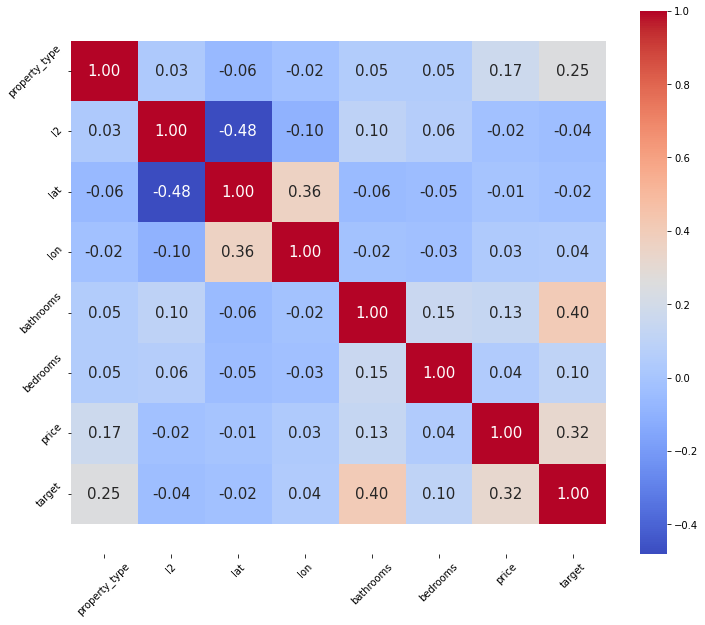

In [54]:
corr = df3.corr()
plot_corre_heatmap(corr)

In [28]:
df3.head()

,property_type,l2,lat,lon,bathrooms,price,target
0,1,0,6.203000,-75.572000,4.0,9.000000e+09,1
1,0,11,4.722748,-74.073115,2.0,6.250000e+08,0
2,1,11,4.709000,-74.030000,2.0,4.200000e+08,0
5,0,5,5.049009,-75.506802,2.0,1.679523e+08,0
6,1,11,4.732379,-74.082150,8.0,2.700000e+09,1


In [55]:
df3.to_csv("tercero_ds.csv")